yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


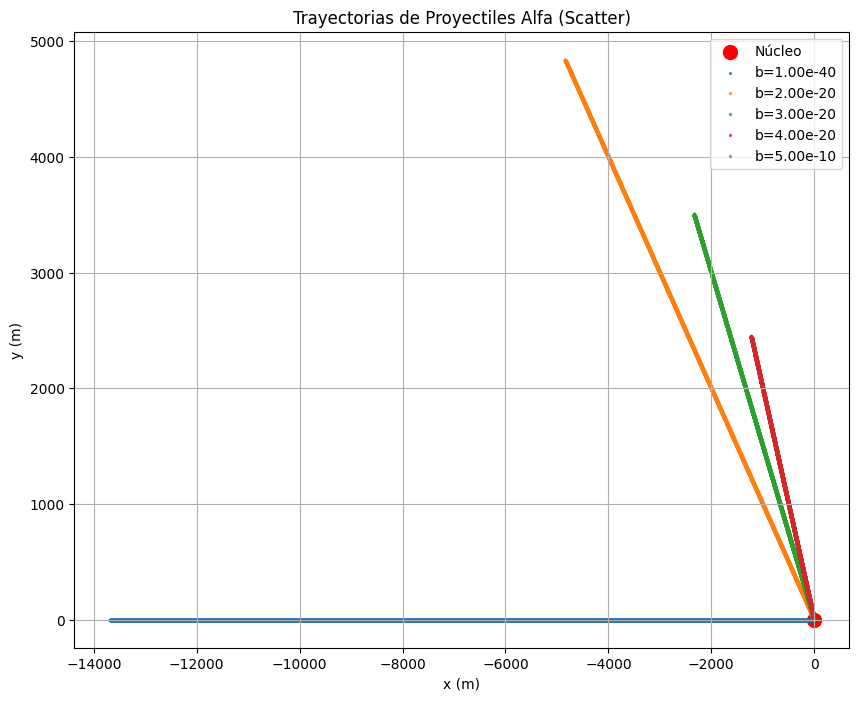

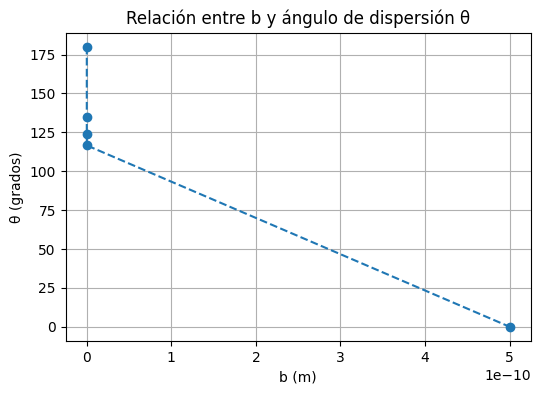

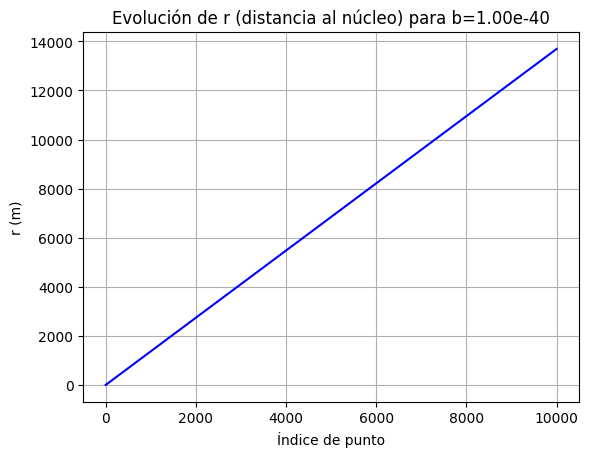

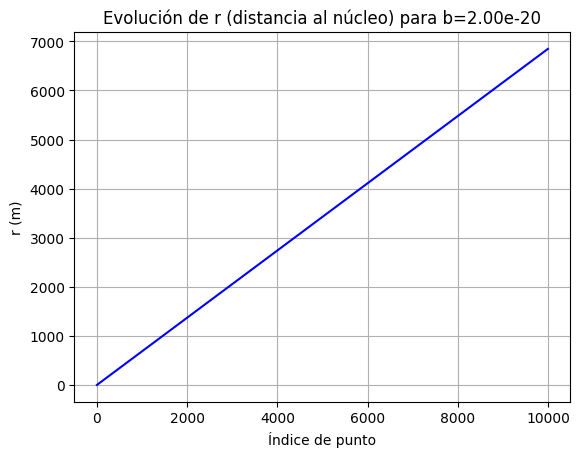

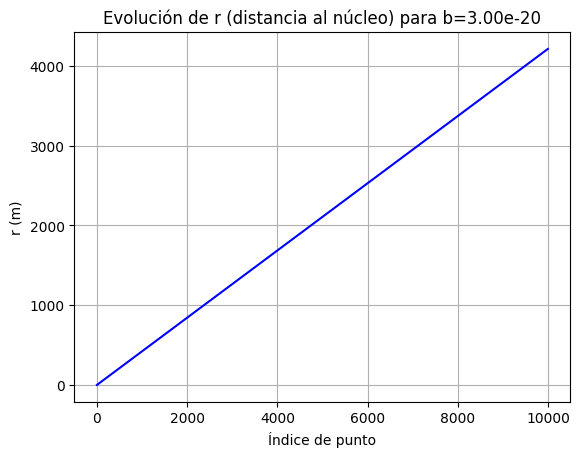

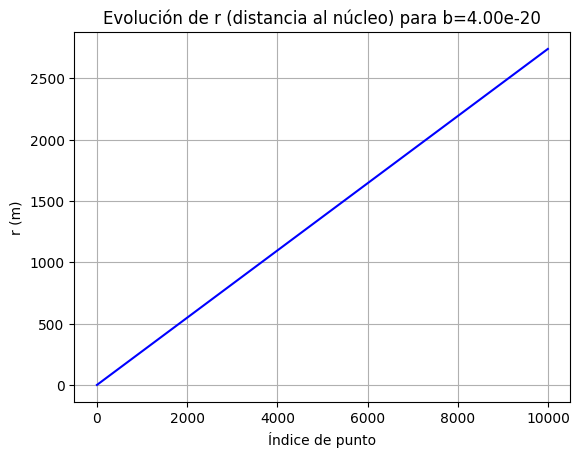

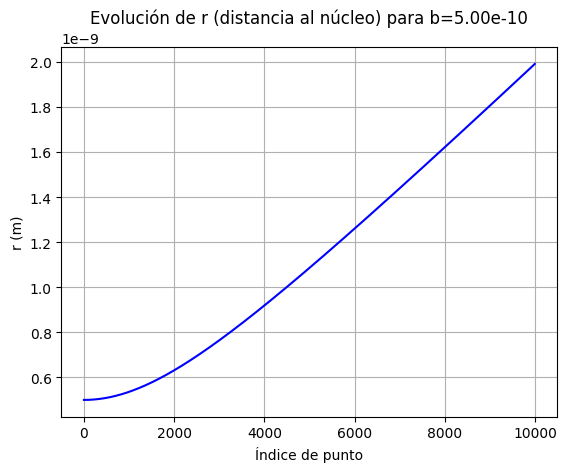

b=1e-40m -> θ=180.0°, r_min=2e-20m
b=2e-20m -> θ=134.9999999999886°, r_min=2.82842712474619e-20m
b=3e-20m -> θ=123.69006752595797°, r_min=3.605551275463989e-20m
b=4e-20m -> θ=116.56505117704194°, r_min=4.472135954999579e-20m
b=5e-10m -> θ=0.0016353614824334234°, r_min=5e-10m


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import pi

tiempo = np.linspace(0,1000,10000)
dt = 1e-20

def radial_distance(location):
    return np.linalg.norm(location)

def velocity(k, alpha_mass):
    k *= 1.6022E-13
    return np.sqrt(2.0 * k / alpha_mass)

def coulomb_force(alpha_charge,target_charge,location,r):
    #c = 1 / (4 *np.pi * 8.854e-12)
    k_coulomb = 8.98e9
    C = k_coulomb*target_charge*alpha_charge

    x = location[0]
    y = location[1]
    F_mag = C/r**2
    F_y = F_mag * y /r
    F_x = F_mag * x /r
    return np.array([F_x, F_y])


def simulation(particle):
    history = []
    r_values = []

    for i in range(len(tiempo)):
        
        location = particle["location"]
        alpha_mass = particle["alpha_mass"]
        alpha_charge = particle["alpha_charge"]
        target_charge = particle["target_charge"] 
        velocity = particle["velocity"]
    
        history.append(location)
        r = radial_distance(location)
        
        r_min = particle["r_min"]
        r_values.append(r)

        if r_min is None or r < r_min:
            particle["r_min"] = r

        force = coulomb_force(alpha_charge, target_charge, location, r)
        acceleration_x = force[0]/alpha_mass
        acceleration_y = force[1]/alpha_mass

        velocity_x = acceleration_x * dt + velocity[0]
        velocity_y = acceleration_y * dt + velocity[1]
        
        velocity = np.array([velocity_x, velocity_y])

        movement_x = velocity_x *dt + location[0]
        movement_y = velocity_y *dt + location[1]
        
        movement = np.array([movement_x, movement_y])
        if movement_x < 0:
            print('yes')

        particle["location"] = movement
        particle["velocity"] = velocity

    particle["history"] = history
    particle["r_values"] = r_values
    velocity_x = particle["velocity"][0]
    velocity_y = particle["velocity"][1]
    
    particle["theta_dispersion"] = np.degrees(np.arctan2(velocity_y, velocity_x))

    return particle

def graphs(alpha_mass, alpha_charge, target_proton_num, k, bs):

    particles = []

    plt.figure(figsize=(10, 8))
    plt.title("Trayectorias de Proyectiles Alfa (Scatter)")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")

    plt.scatter([0], [0], color="red", s=100, label="Núcleo")
        
    angles = []
    minimum_dist = []
    target_charge = target_proton_num * 1.6e-19

    for b in bs:
        l0 = [-2e-20, b]
        v0 = [velocity(k, alpha_mass), 0.0]

        particle = {"alpha_mass": alpha_mass,
                    "alpha_charge": alpha_charge,
                    "location" : l0,
                    "velocity" : v0,
                    "target_charge": target_charge,
                    "r_min": None,
                    "history": None}
        
        particle = simulation(particle)
        particles.append(particle)

        history = particle["history"]

        xs = [p[0] for p in history]
        ys = [p[1] for p in history]
        plt.scatter(xs, ys, s=2, alpha=0.7, label=f"b={b:.2e}")

        angles.append(particle["theta_dispersion"])
        minimum_dist.append(particle["r_min"])

    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(6,4))
    plt.title("Relación entre b y ángulo de dispersión θ")
    plt.xlabel("b (m)")
    plt.ylabel("θ (grados)")
    plt.plot(bs, angles, 'o--')
    plt.grid(True)
    plt.show()

    for i, particle in enumerate(particles):
            plt.figure()
            plt.title(f"Evolución de r (distancia al núcleo) para b={bs[i]:.2e}")
            plt.xlabel("Índice de punto")
            plt.ylabel("r (m)")
            plt.plot(particle["r_values"], '-b')
            plt.grid(True)
            plt.show()

    for i, b in enumerate(bs):
            print(f"b={b}m -> θ={angles[i]}°, r_min={minimum_dist[i]}m")

bs = [1.0e-40, 2.0e-20, 3.0e-20, 4.0e-20, 5.0e-10]
alpha_mass = 6.64e-27
alpha_charge = 2.0 * 1.60217662e-19
target_proton_num = 79
k = 7.7
graphs(alpha_mass, alpha_charge, target_proton_num, k, bs)